In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn.decomposition import FastICA
from sklearn.feature_selection import SelectPercentile as sp
from matplotlib import pyplot
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("Colon.csv")
data

,8589.416,5468.2407,4263.4077,4064.9358,1997.893,5282.325,2169.72,2773.4211,7526.386,4607.6763,...,67.56125,259.9125,138.89874,88.2325,39.66786,67.82875,75.6775,83.5225,28.70125,Tumor
0,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033330,152.19500,186.56750,44.47250,16.77375,Normal
1,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,Tumor
2,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,...,41.68375,5.92500,183.00626,74.52875,67.710720,48.33875,42.52000,49.98250,16.08500,Normal
3,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,...,76.60375,161.35000,61.70125,54.56375,223.359530,73.09875,57.59875,7.48875,31.81250,Tumor
4,2510.3250,1960.6545,1566.3150,3072.8162,1810.2048,1673.5643,1290.4211,2465.8462,1675.5438,1312.8083,...,47.53500,147.23625,28.31000,33.19500,91.850000,5.87875,36.29750,9.81500,21.88375,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,4972.1660,4173.9180,3668.5337,1567.5554,1570.4406,3466.8108,2106.4988,1535.7574,1887.6212,3519.6000,...,6.44750,156.44500,93.95000,86.90875,95.442856,31.18750,57.15250,13.96000,10.54750,Tumor
57,9112.3720,6824.4863,5982.8460,3147.0430,4847.3080,11222.6820,6333.4727,4299.5024,4644.4424,5888.5464,...,35.87875,342.65000,84.75125,60.27375,143.877380,8.99625,106.87875,23.20250,32.16625,Tumor
58,6730.6250,3472.1250,2559.4624,2624.6892,1596.2179,4372.7890,3798.5261,1026.4775,3512.3337,3243.1690,...,119.96250,111.60375,166.75500,130.45500,124.253570,96.46500,133.52126,93.09875,7.43250,Normal
59,6234.6226,4005.3000,3093.6750,3183.0857,1795.3107,3940.8464,2019.8500,1406.6500,2927.7937,2177.3203,...,85.25875,206.53625,80.44875,104.80500,180.941670,68.93375,118.20125,32.68750,23.26500,Tumor


In [3]:
last_row = data["Tumor"]
last_row.replace({"Normal" : 0, "Tumor" : 1}, inplace = True)
last_row

0     0
1     1
2     0
3     1
4     0
     ..
56    1
57    1
58    0
59    1
60    0
Name: Tumor, Length: 61, dtype: int64

In [4]:
data.drop("Tumor", inplace = True, axis = 1)
data

,8589.416,5468.2407,4263.4077,4064.9358,1997.893,5282.325,2169.72,2773.4211,7526.386,4607.6763,...,99.11072,67.56125,259.9125,138.89874,88.2325,39.66786,67.82875,75.6775,83.5225,28.70125
0,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,...,126.789290,92.23875,96.27625,150.59000,82.23750,85.033330,152.19500,186.56750,44.47250,16.77375
1,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,...,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625
2,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,...,152.595250,41.68375,5.92500,183.00626,74.52875,67.710720,48.33875,42.52000,49.98250,16.08500
3,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,...,126.464290,76.60375,161.35000,61.70125,54.56375,223.359530,73.09875,57.59875,7.48875,31.81250
4,2510.3250,1960.6545,1566.3150,3072.8162,1810.2048,1673.5643,1290.4211,2465.8462,1675.5438,1312.8083,...,122.533330,47.53500,147.23625,28.31000,33.19500,91.850000,5.87875,36.29750,9.81500,21.88375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,4972.1660,4173.9180,3668.5337,1567.5554,1570.4406,3466.8108,2106.4988,1535.7574,1887.6212,3519.6000,...,70.667854,6.44750,156.44500,93.95000,86.90875,95.442856,31.18750,57.15250,13.96000,10.54750
57,9112.3720,6824.4863,5982.8460,3147.0430,4847.3080,11222.6820,6333.4727,4299.5024,4644.4424,5888.5464,...,129.404750,35.87875,342.65000,84.75125,60.27375,143.877380,8.99625,106.87875,23.20250,32.16625
58,6730.6250,3472.1250,2559.4624,2624.6892,1596.2179,4372.7890,3798.5261,1026.4775,3512.3337,3243.1690,...,254.865480,119.96250,111.60375,166.75500,130.45500,124.253570,96.46500,133.52126,93.09875,7.43250
59,6234.6226,4005.3000,3093.6750,3183.0857,1795.3107,3940.8464,2019.8500,1406.6500,2927.7937,2177.3203,...,190.711900,85.25875,206.53625,80.44875,104.80500,180.941670,68.93375,118.20125,32.68750,23.26500


In [5]:
data.isnull().sum().sum()

0

In [6]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.704491,0.804772,0.435373,-0.132916,-0.693524,0.364318,0.127203,-0.071748,0.997926,0.382753,...,-0.519727,-0.109419,-1.102094,0.346563,-0.510703,-0.638894,0.787052,0.807981,-0.216457,-0.932611
1,-1.025270,0.919415,0.702993,0.356168,-1.321467,-1.301621,-1.227327,-1.248917,-0.559436,-0.616731,...,-0.305422,-0.231661,-1.465791,0.920368,-0.562726,0.239985,-0.617023,-0.829870,-0.958150,-0.989695
2,-0.240917,1.309359,1.025260,-0.005428,-0.702853,-1.068935,-1.116900,-1.032955,-0.319672,0.475555,...,-0.299290,-0.758319,-1.606293,0.775841,-0.586872,-0.747962,-0.418387,-0.831420,-0.072457,-0.956918
3,-1.218180,-0.577848,-0.380221,-0.259001,-0.570551,-0.738793,-0.828081,0.066530,-0.556749,-0.456653,...,-0.522503,-0.310102,-0.738954,-0.830562,-0.784142,0.232047,-0.131002,-0.659809,-1.183004,-0.401871
4,-1.451471,-1.370283,-1.389283,-0.452541,-0.845219,-1.259367,-1.246103,-0.363598,-1.238089,-1.347511,...,-0.556081,-0.683216,-0.817715,-1.272751,-0.995282,-0.595975,-0.911212,-0.902238,-1.122208,-0.752271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,-0.653802,-0.358706,-0.232916,-1.198066,-1.022624,-0.512085,-0.808087,-1.192338,-1.149322,-0.253259,...,-0.999121,-1.210596,-0.766326,-0.403502,-0.464547,-0.573353,-0.617458,-0.664888,-1.013882,-1.152345
57,0.687680,0.852742,1.040118,-0.415778,1.401980,2.719943,1.460671,1.270250,0.004567,0.921399,...,-0.497385,-0.832830,0.272778,-0.525318,-0.727723,-0.268395,-0.875027,-0.098955,-0.772335,-0.389386
58,-0.084038,-0.679462,-0.842982,-0.674489,-1.003551,-0.134546,0.100080,-1.646123,-0.469286,-0.390329,...,0.574312,0.246431,-1.016560,0.560630,-0.034275,-0.391953,0.140205,0.204263,1.054358,-1.262278
59,-0.244749,-0.435773,-0.549128,-0.397927,-0.856239,-0.314545,-0.854594,-1.307377,-0.713950,-0.918837,...,0.026306,-0.199011,-0.486795,-0.582295,-0.287718,-0.035028,-0.179345,0.029907,-0.524451,-0.703525


In [7]:
def RFC(data, target_row):
    train_x, val_x, train_y, val_y = train_test_split(data, target_row, test_size = 0.2, random_state = 42)
    model_rfc = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=10)    
    model_rfc.fit(train_x, train_y)
    preds = model_rfc.predict(val_x)
    score = accuracy_score(val_y, preds)
    roc_curve_score = roc_auc_score(val_y, preds)
    x, y, _ = roc_curve(val_y, preds)
    pyplot.title("Random forest classifier")
    pyplot.plot(x, y, linestyle='--')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    print("ROC score " + str(roc_auc_score(val_y, preds)))
    print("F1 score " + str(f1_score(val_y, preds, average="macro")))
    print("Precision score " + str(precision_score(val_y, preds, average="macro")))
    print("Recall score " + str(recall_score(val_y, preds, average="macro")))  
    return score

In [8]:
def DTC(data, target_row):
    train_x, val_x, train_y, val_y = train_test_split(data, target_row, test_size = 0.3, random_state = 42)
    model_dtc = DecisionTreeClassifier(max_depth=100, random_state=42)
    model_dtc.fit(train_x, train_y)
    preds = model_dtc.predict(val_x)
    score = accuracy_score(val_y, preds)
    roc_curve_score = roc_auc_score(val_y, preds)
    x, y, _ = roc_curve(val_y, preds)
    pyplot.title("Decision tree classifier")
    pyplot.plot(x, y, linestyle='--')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    print("ROC score " + str(roc_auc_score(val_y, preds)))
    print("F1 score " + str(f1_score(val_y, preds, average="macro")))
    print("Precision score " + str(precision_score(val_y, preds, average="macro")))
    print("Recall score " + str(recall_score(val_y, preds, average="macro")))
    return score

In [9]:
def KNN(data, target_row):
    train_x, val_x, train_y, val_y = train_test_split(data, target_row, test_size = 0.2, random_state = 42)
    model_knn = KNeighborsClassifier(n_neighbors=30, n_jobs=-1)
    model_knn.fit(train_x, train_y)
    preds = model_knn.predict(val_x)
    score = accuracy_score(val_y, preds)
    roc_curve_score = roc_auc_score(val_y, preds)
    x, y, _ = roc_curve(val_y, preds)
    pyplot.title("K Nearest Neighbor")
    pyplot.plot(x, y, linestyle='--')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    print("ROC score " + str(roc_auc_score(val_y, preds)))
    print("F1 score " + str(f1_score(val_y, preds, average="macro")))
    print("Precision score " + str(precision_score(val_y, preds, average="macro")))
    print("Recall score " + str(recall_score(val_y, preds, average="macro")))
    return score

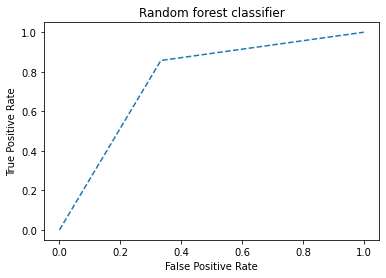

ROC score 0.7619047619047621
F1 score 0.7636363636363636
Precision score 0.775
Recall score 0.7619047619047619
Accuracy score is 0.7692307692307693


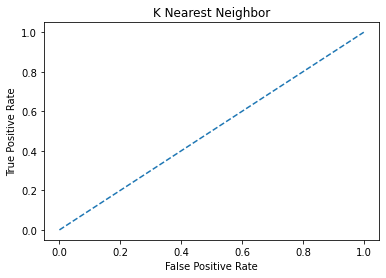

ROC score 0.5
F1 score 0.35000000000000003
Precision score 0.2692307692307692
Recall score 0.5
Accuracy score is 0.5384615384615384


C:\Users\Srilahari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


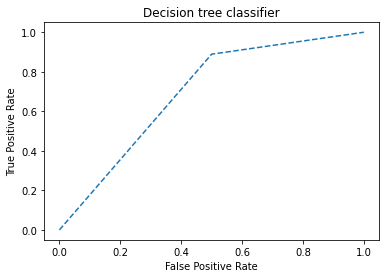

ROC score 0.6944444444444444
F1 score 0.6761363636363638
Precision score 0.7243589743589745
Recall score 0.6944444444444444
Accuracy score is 0.6842105263157895


In [10]:
print("Accuracy score is " + str(RFC(data, last_row)))
print("Accuracy score is " + str(KNN(data, last_row)))
print("Accuracy score is " + str(DTC(data, last_row)))

In [11]:
pca = decomposition.PCA(n_components=61, random_state=42)
data_pca = pca.fit_transform(data)
data_pca = pd.DataFrame(data_pca)
data_pca

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,5.566032,-17.571269,1.170518,-4.934075,-7.679977,-6.164077,-5.694262,8.982682,-3.018727,-0.136963,...,-1.607794,-0.195674,0.697151,0.282191,0.216894,0.104044,0.287547,0.070557,0.021609,1.333133e-14
1,-30.106019,-12.301039,3.863186,-1.494989,2.676887,-6.167938,7.457163,-2.954299,6.411309,-12.730122,...,0.389009,0.939661,0.671450,0.034531,-0.820750,0.288888,-0.485352,0.076069,-0.274123,1.333133e-14
2,-19.374528,-19.050355,-1.586584,5.406434,-2.427684,-8.215381,-2.654691,5.318633,3.867385,-9.080610,...,0.094987,-3.215218,0.229468,-1.341303,1.249496,-0.867494,-0.604562,-0.064956,0.124220,1.333133e-14
3,-24.300807,6.415439,3.830291,-1.177323,8.961018,1.293264,1.059638,-1.559335,-0.781467,1.824841,...,-3.843439,2.031902,-4.279356,-0.530695,-0.094301,-1.795448,-1.612186,0.423346,0.052613,1.333133e-14
4,-35.011650,7.267685,1.014525,-5.719350,10.362763,-2.427236,1.045932,1.881296,0.453916,3.222108,...,1.031588,-0.104658,-0.261509,0.015298,1.294267,0.654670,6.540129,-2.739970,-2.470239,1.333133e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,-34.040215,-3.183698,0.852533,2.673525,-9.563454,5.945115,2.006960,0.948299,-5.959166,-3.567304,...,1.100676,-0.165770,2.306978,-2.510690,6.152868,0.290862,-1.249983,1.229059,-0.558355,1.333133e-14
57,0.963798,5.053142,-8.133264,11.605003,-7.421458,1.709286,-6.200832,-9.699400,-3.204882,2.006062,...,0.071010,0.215574,0.261131,0.466198,-0.285466,-0.078806,0.402662,0.163348,0.097199,1.333133e-14
58,0.856179,-13.141201,-5.128941,-15.608174,-8.594814,8.670946,-2.860543,2.944369,-5.158759,-1.968738,...,2.443726,1.105141,0.407434,0.731065,0.452450,0.457730,0.178972,-0.101681,-0.231495,1.333133e-14
59,-16.199208,4.185571,-1.386423,-0.992050,-9.226897,5.394147,6.284377,-1.122001,0.531299,-4.980397,...,0.903200,0.364923,-0.098580,-0.781434,0.523046,-1.158865,-0.047895,0.199063,-0.268604,1.333133e-14


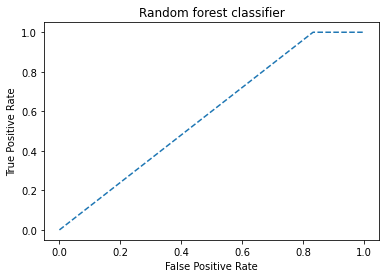

ROC score 0.5833333333333333
F1 score 0.5112781954887218
Precision score 0.7916666666666667
Recall score 0.5833333333333334
Accuracy score is 0.6153846153846154


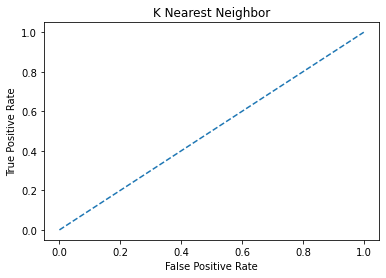

ROC score 0.5
F1 score 0.35000000000000003
Precision score 0.2692307692307692
Recall score 0.5
Accuracy score is 0.5384615384615384


C:\Users\Srilahari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


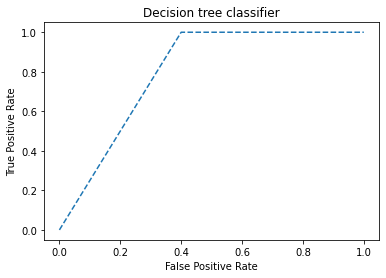

ROC score 0.8
F1 score 0.784090909090909
Precision score 0.8461538461538461
Recall score 0.8
Accuracy score is 0.7894736842105263


In [12]:
print("Accuracy score is " + str(RFC(data_pca, last_row)))
print("Accuracy score is " + str(KNN(data_pca, last_row)))
print("Accuracy score is " + str(DTC(data_pca, last_row)))

In [13]:
ica = FastICA(n_components=100, random_state=42)
data_ica = ica.fit_transform(data)
data_ica = pd.DataFrame(data_ica)

C:\Users\Srilahari\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:468: UserWarning: n_components is too large: it will be set to 61
  warnings.warn(
C:\Users\Srilahari\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


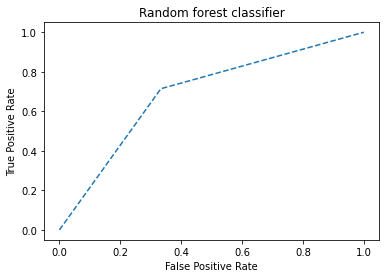

ROC score 0.6904761904761906
F1 score 0.6904761904761905
Precision score 0.6904761904761905
Recall score 0.6904761904761905
Accuracy score is 0.6923076923076923


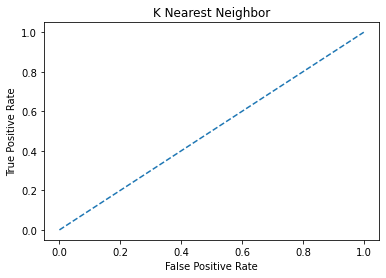

ROC score 0.5
F1 score 0.35000000000000003
Precision score 0.2692307692307692
Recall score 0.5
Accuracy score is 0.5384615384615384


C:\Users\Srilahari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


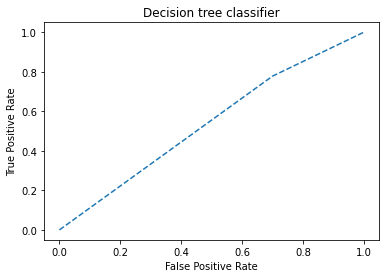

ROC score 0.538888888888889
F1 score 0.5043478260869565
Precision score 0.55
Recall score 0.5388888888888889
Accuracy score is 0.5263157894736842


In [14]:
print("Accuracy score is " + str(RFC(data_ica, last_row)))
print("Accuracy score is " + str(KNN(data_ica, last_row)))
print("Accuracy score is " + str(DTC(data_ica, last_row)))

In [15]:
mi = sp(percentile=50)
data_mi = mi.fit(data, last_row)
data_mi = mi.transform(data)
data_mi = pd.DataFrame(data_mi)

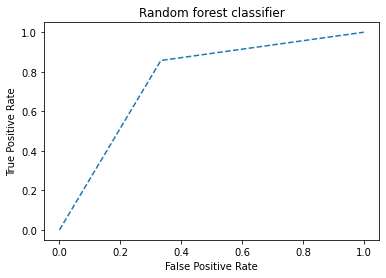

ROC score 0.7619047619047621
F1 score 0.7636363636363636
Precision score 0.775
Recall score 0.7619047619047619
Accuracy score is 0.7692307692307693


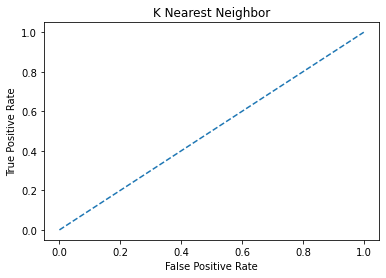

ROC score 0.5
F1 score 0.35000000000000003
Precision score 0.2692307692307692
Recall score 0.5
Accuracy score is 0.5384615384615384


C:\Users\Srilahari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


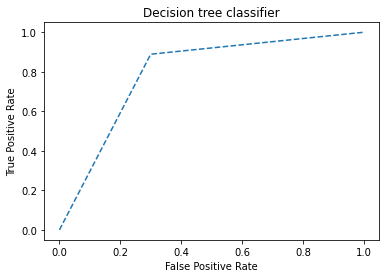

ROC score 0.7944444444444444
F1 score 0.7888888888888888
Precision score 0.8011363636363636
Recall score 0.7944444444444444
Accuracy score is 0.7894736842105263


In [16]:
print("Accuracy score is " + str(RFC(data_mi, last_row)))
print("Accuracy score is " + str(KNN(data_mi, last_row)))
print("Accuracy score is " + str(DTC(data_mi, last_row)))